In [1]:
# setup gui for matplotlib interactive plots - move to bookeh lateron
%matplotlib notebook 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Human readable code
<a id='human_readable'></a>

In [8]:
numbers = [1,2,3,4,'hello world']
for number in numbers:
    print('number', number)

number 1
number 2
number 3
number 4
number hello world


# Tools and Packages
<a id='packages'></a>

install packages systemwide using a terminal and typing: `pip install pyusb`, or install _from within the notebook_:

In [9]:
!pip install pyusb
!pip install pyserial

    100% |████████████████████████████████| 61kB 567kB/s ta 0:00:01
  Stored in directory: /home/nils/.cache/pip/wheels/1f/a9/7e/d189b5030ee3a56f9b72c28281bb11d661b8ea312e28de08a5
Successfully built pyusb


In [10]:
import usb
help(usb.core)

Help on module usb.core in usb:

NAME
    usb.core - usb.core - Core USB features.

DESCRIPTION
    This module exports:
    
    Device - a class representing a USB device.
    Configuration - a class representing a configuration descriptor.
    Interface - a class representing an interface descriptor.
    Endpoint - a class representing an endpoint descriptor.
    find() - a function to find USB devices.
    show_devices() - a function to show the devices present.

CLASSES
    builtins.object
        Configuration
        Endpoint
        Interface
    usb._objfinalizer.AutoFinalizedObject(usb._objfinalizer._AutoFinalizedObjectBase)
        Device
    
    class Configuration(builtins.object)
     |  Represent a configuration object.
     |  
     |  This class contains all fields of the Configuration Descriptor according to
     |  the USB Specification. You may access them as class properties.  For
     |  example, to access the field bConfigurationValue of the configuration
     |

### Find connected USB devices

In [11]:
import usb.core
usb.core.show_devices()

DEVICE ID 8087:8000 on Bus 001 Address 002, Hub
DEVICE ID 1d6b:0002 on Bus 001 Address 001, Hub
DEVICE ID 1d6b:0003 on Bus 003 Address 001, Hub
DEVICE ID 8087:07dc on Bus 002 Address 003, Wireless Controller
DEVICE ID 0bda:572a on Bus 002 Address 002, Miscellaneous
DEVICE ID 0403:6001 on Bus 002 Address 099, Specified at interface
DEVICE ID 0ac8:3420 on Bus 002 Address 100, Miscellaneous
DEVICE ID 1d6b:0002 on Bus 002 Address 001, Hub

### Specs for USB Serial Port

In [5]:
import serial
help(serial.Serial.__init__)

Help on function __init__ in module serial.serialutil:

__init__(self, port=None, baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, write_timeout=None, dsrdtr=False, inter_byte_timeout=None, exclusive=None, **kwargs)
    Initialize comm port object. If a "port" is given, then the port will be
    opened immediately. Otherwise a Serial port object in closed state
    is returned.



# Device Control Examples
<a id='examples'></a>

## Example 1: Camera
<a id='camera'></a>
_dependencies_

In [29]:
import cv2
import matplotlib.pyplot as plt

_assign video device_

In [35]:
for i in range(5):
    cam = cv2.VideoCapture(i+2)
    access = cam.read()[0]
    if access:
        print('video%i'%(i+2), access)
        break

video6 True


In [34]:
cam.read()

(False, None)

_acquire and plot picture_

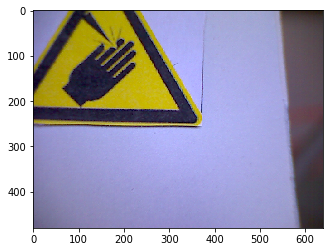

In [14]:
bgr_pic = [cam.read() for i in range(10)][-1]
b,g,r = cv2.split(bgr_pic[1])
rgb_pic = cv2.merge([r,g,b])

plt.imshow(rgb_pic)
plt.show()

_load function from file_

In [16]:
from modules.Cam import get_img

In [37]:
yAxis.move_relative(30)

new position:
[-5.0, 40.0, 0.0]


_use function acquire, plot and save image_

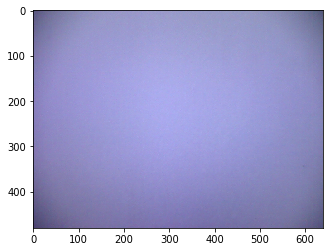

In [38]:
img = get_img(5, cam, cv2)

cv2.imwrite('test_img.png', img)

plt.imshow(img)
plt.show()

## Example 2: Stage
<a id='stage'></a>
_dependencies_

In [18]:
import serial as sl
import os

_import object `classes`_

In [19]:
from modules.MyStage import MyStage, MyAxes, MovementButtons
#help(MyStage)

_Stage and Axes:_ __instances__

In [21]:
Stage = MyStage(os, sl)
xAxis= MyAxes(Stage, x=True)

Stage.set_velocity(3)
help(Stage)


 Stage module loaded - do "dmesg | grep tty" to list Ports of connected serial devices:

Port from output : 

 Try to connect to SerialPort: 
/dev/ttyUSB1
Maximum Velocity set to 3.000000.
Help on MyStage in module modules.MyStage object:

class MyStage(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, os, serial_module, n_xips=1)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  close(self)
 |  
 |  connect(self, serialPort, baud=57600)
 |  
 |  get_permission(self, serialPort)
 |  
 |  get_pos(self)
 |  
 |  go_home(self)
 |  
 |  isOpen(self)
 |  
 |  moving(self)
 |  
 |  read(self)
 |  
 |  save(self)
 |  
 |  send(self, command)
 |  
 |  set_home(self)
 |  
 |  set_velocity(self, velocity)
 |  
 |  user_init(self)
 |  
 |  wait_for_movement(self)
 |  
 |  write(self, what)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instan

In [22]:
Stage.get_pos()

[-5.0, 0.0, 0.0]

In [25]:
yAxis = MyAxes(Stage, y=True)

In [26]:
yAxis.move_relative(10)

new position:
[-5.0, 10.0, 0.0]


_Ease of use:_ Button Widgets

In [42]:
MovementButtons(Stage)

NameError: name 'BoundedFloatText' is not defined

## Example 3: Spectrometer
<a id='spectrometer'></a>

In [2]:
%run modules/MyOpticsLab.py


 Hello nils! Welcome to LabOptica :)

 The following Ocean Optics devices have been recognized:
[<SeaBreezeDevice QE65000:QEB0653>, <SeaBreezeDevice QE65000:QEPB0195>]

 Connected to QE65000

 Connected to QE65Pro


interactive(children=(RadioButtons(description='devices', options=('QE65000', 'QE65Pro'), value='QE65000'), Checkbox(value=False, description='light'), Output()), _dom_classes=('widget-interact',))

In [10]:
spectrometer_edition = 'QE65000'

<IPython.core.display.Javascript object>


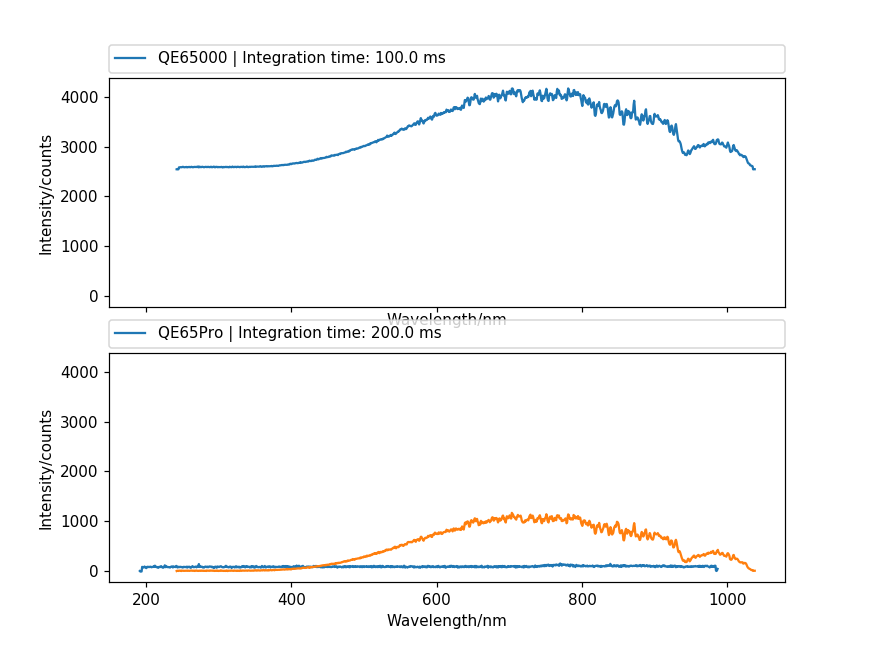

In [3]:
ViewPort

In [6]:
OO['QE65Pro'].IT/1000 # ms

200.0

In [8]:
OO['QE65Pro'].light_on()

## Example 4: TTL
<a id='spectrometer_extension'></a>

In [11]:
OO[spectrometer_edition].light_on()

In [12]:
OO[spectrometer_edition].light_off()

<a id='implementation'></a>
# Implementation

<a id='create_sequence'></a>
## Define acquisition sequence

In [13]:
def sequence():
    OO[spectrometer_edition].light_off()
    dark= OO[spectrometer_edition].get_signal()
    
    OO[spectrometer_edition].light_on()
    i = OO[spectrometer_edition].get_signal()
    
    return i-dark

In [14]:
plt.plot(OO[spectrometer_edition].WL, sequence())

In [ ]:
plot.show()